# OCR Nutrition Table Scanner

This notebook demonstrates the process of reading characters from a receipt (image) using pytesseract. Below are the steps involved in doing so:

1. Read the image in and resize it to make receipt components readable
2. Pre-process image to denoise it, and find the edges using Canny Edge Detector
3. Find Contours to extract the receipt from the image
4. Apply OCR using Pytesseract on the extracted receipt

### Importing Required Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import imutils
from imutils.perspective import four_point_transform

### Reading Image

(-0.5, 599.5, 799.5, -0.5)

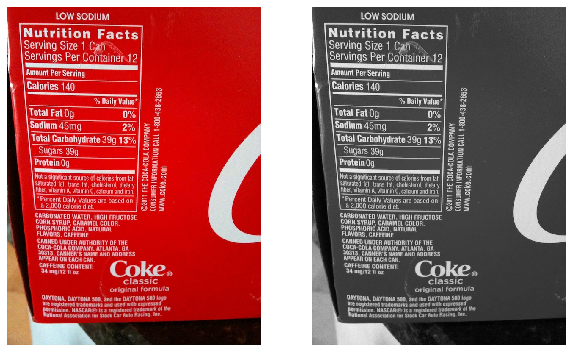

In [2]:
image = cv.imread("coke-nutrition-label.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.axis("off")

plt.subplot(122)
plt.imshow(gray, cmap="gray")
plt.axis("off")

### Image Pre-processing

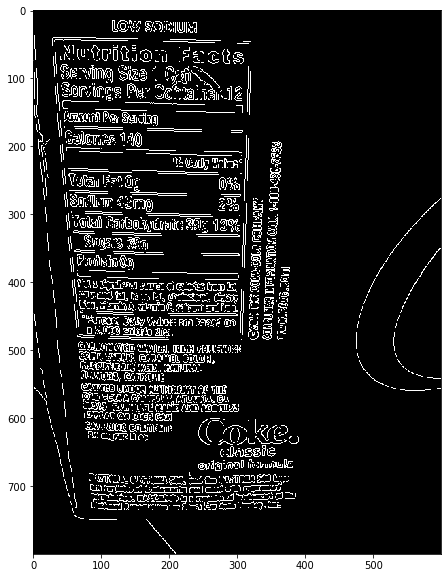

In [3]:
blurred = cv.GaussianBlur(gray, (5,5), 0)
edges = cv.Canny(blurred, 75, 200)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap="gray")

### Finding Contours

In [4]:
cnts = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv.contourArea, reverse=True)

In [5]:
receiptCnts = None

for c in cnts:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02*peri, True)
    
    if len(approx) == 4:
        receiptCnts = approx
        break

### Outlining Nutrition Table

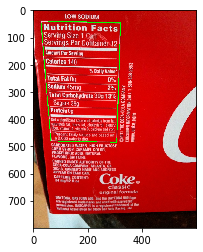

In [6]:
output = image.copy()
cv.drawContours(output, [receiptCnts], -1, (0,255,0), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

### Extracting Nutrition Table

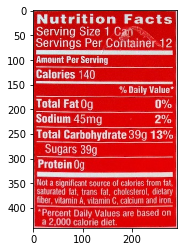

In [7]:
final_output = four_point_transform(image, receiptCnts.reshape(4,2))
plt.imshow(final_output[:,:,::-1])

### OCR Using Pytesseract

In [8]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
text = pytesseract.image_to_string(cv.cvtColor(final_output, cv.COLOR_BGR2RGB))

In [9]:
print(text)

Nutrition Facts
Serving Size 1 Cafi‘
Servings Per Container12
Amount Per Serving

Calories 140

Total Fat 0g

Sodium 45mg

Total Carbohydrate 39g 13%
Sugars 39g

Protein 0g

ESET ET
Not a significant source of calories from fat
salad | fat, trans fat, cholesterol, dietary
fiber, vitamin A, vitamin C, calcium and iron.

“Percent Daily Values are based on
a 2,000 calorie diet.




Mostly read correctly with slight errors !